In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import random
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('train_clean.csv', index_col=0)
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Unknown,S


In [3]:
y = data['Survived'].copy()
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=111)
X_train.shape, X_test.shape

((623, 8), (268, 8))

In [4]:
def shift_0_age(age):
    if age == 0:
        return 30
    else:
        return age

def toNumbers(data):
    X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
    X['Sex'] = (data['Sex'] == 'female')
    X['Age'] = X['Age'].apply(shift_0_age)
    X['isCabin'] = (data['Cabin'] != 'Unknown')
    X['Embarked'] = data['Embarked'].apply(ord)
    return X

In [5]:
X1_train = toNumbers(X_train)
X1_test = toNumbers(X_test)
X1_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,isCabin,Embarked
680,3,30.0,0,0,8.1375,True,False,81
810,3,26.0,0,0,7.8875,False,False,83
727,3,30.0,0,0,7.7375,True,False,81
775,3,18.0,0,0,7.7500,False,False,83
795,2,39.0,0,0,13.0000,False,False,83


In [6]:
rf1 = RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=10, min_impurity_decrease=0.02)
rf1.fit(X1_train, y_train)
rf1.score(X1_test, y_test)

0.7910447761194029

In [7]:
params = {'max_depth': range(4, 12), 'min_samples_split': range(2,21)}

clf = GridSearchCV(RandomForestClassifier(), params, return_train_score=True, cv=5)
clf.fit(X1_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('Best parameters:', clf.best_params_)
print(clf.best_score_, accuracy_score(y_test, clf.predict(X1_test)))

0.804 (+/-0.072) for {'max_depth': 4, 'min_samples_split': 2}
0.809 (+/-0.079) for {'max_depth': 4, 'min_samples_split': 3}
0.806 (+/-0.067) for {'max_depth': 4, 'min_samples_split': 4}
0.790 (+/-0.062) for {'max_depth': 4, 'min_samples_split': 5}
0.785 (+/-0.100) for {'max_depth': 4, 'min_samples_split': 6}
0.814 (+/-0.055) for {'max_depth': 4, 'min_samples_split': 7}
0.814 (+/-0.076) for {'max_depth': 4, 'min_samples_split': 8}
0.801 (+/-0.092) for {'max_depth': 4, 'min_samples_split': 9}
0.819 (+/-0.081) for {'max_depth': 4, 'min_samples_split': 10}
0.795 (+/-0.054) for {'max_depth': 4, 'min_samples_split': 11}
0.803 (+/-0.043) for {'max_depth': 4, 'min_samples_split': 12}
0.798 (+/-0.060) for {'max_depth': 4, 'min_samples_split': 13}
0.807 (+/-0.077) for {'max_depth': 4, 'min_samples_split': 14}
0.787 (+/-0.067) for {'max_depth': 4, 'min_samples_split': 15}
0.799 (+/-0.055) for {'max_depth': 4, 'min_samples_split': 16}
0.798 (+/-0.083) for {'max_depth': 4, 'min_samples_split': 17}


In [8]:
rf2 = RandomForestClassifier(max_depth=5, random_state=50, min_samples_split=7)
rf2.fit(X1_train, y_train)
rf2.score(X1_test, y_test)

0.7835820895522388

In [9]:
rf2.feature_importances_

array([0.12592568, 0.10858254, 0.06962965, 0.05239097, 0.22075994,
       0.3608533 , 0.03756861, 0.02428931])

In [10]:
X1_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'isCabin',
       'Embarked'],
      dtype='object')

In [11]:
X1_train[X1_train['Age'] < 11].shape

(48, 8)

In [12]:
X2_train = X1_train.drop(['Embarked'], axis=1)
X2_test = X1_test.drop(['Embarked'], axis=1)
X2_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,isCabin
680,3,30.0,0,0,8.1375,True,False
810,3,26.0,0,0,7.8875,False,False
727,3,30.0,0,0,7.7375,True,False
775,3,18.0,0,0,7.7500,False,False
795,2,39.0,0,0,13.0000,False,False


In [42]:
params = {'max_depth': range(5, 12), 'min_samples_split': range(7,21),
          'min_impurity_decrease': [0.001, 0.002, 0.003, 0.004]}
clf2 = GridSearchCV(RandomForestClassifier(), params, return_train_score=True, cv=5)
clf2.fit(X2_train, y_train)
means = clf2.cv_results_['mean_test_score']
stds = clf2.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print('Best parameters:', clf2.best_params_)
print(clf2.best_score_, accuracy_score(y_test, clf2.predict(X2_test)))

Best parameters: {'max_depth': 6, 'min_impurity_decrease': 0.001, 'min_samples_split': 18}
0.8234349919743178 0.7910447761194029


## Split the initial data

In [16]:
XY_train = X2_train.copy()
XY_test = X2_test.copy()
XY_train['y'] = y_train
XY_test['y'] = y_test

XY_fc_train = XY_train[(XY_train['Sex']) | (XY_train['Age'] < 11)]
XY_m_train = XY_train[(XY_train['Sex'] == False) & (XY_train['Age'] >= 11)]
XY_fc_test = XY_test[(XY_test['Sex']) | (XY_test['Age'] < 11)]
XY_m_test = XY_test[(XY_test['Sex'] == False) & (XY_test['Age'] >= 11)]
XY_fc_train.shape, XY_m_train.shape

((243, 8), (380, 8))

In [22]:
y_fc_train = XY_fc_train['y']
X_fc_train = XY_fc_train.drop(['Sex','y'], axis=1)
y_m_train = XY_m_train['y']
X_m_train = XY_m_train.drop(['Sex','y'], axis=1)
y_fc_test = XY_fc_test['y']
X_fc_test = XY_fc_test.drop(['Sex', 'y'], axis=1)
y_m_test = XY_m_test['y']
X_m_test = XY_m_test.drop(['Sex', 'y'], axis=1)

X_m_train.head()

,Pclass,Age,SibSp,Parch,Fare,isCabin
810,3,26.0,0,0,7.8875,False
775,3,18.0,0,0,7.7500,False
795,2,39.0,0,0,13.0000,False
845,3,42.0,0,0,7.5500,False
857,1,51.0,0,0,26.5500,True


In [74]:
parameters = {'max_depth': range(5,14), 'min_samples_split': range(5,21),
              'min_impurity_decrease': [0.002, 0.003, 0.004, 0.005]}
clf_fc = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True)
clf_fc.fit(X_fc_train, y_fc_train)
print('Best parameters: ', clf_fc.best_params_)
print(clf_fc.best_score_, clf_fc.score(X_fc_test, y_fc_test))

Best parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.003, 'min_samples_split': 13}
0.8559670781893004 0.7980769230769231


In [39]:
dtree_fc = DecisionTreeClassifier(max_depth=6, random_state=5, min_impurity_decrease=0.003)
dtree_fc.fit(X_fc_train, y_fc_train)
dtree_fc.score(X_fc_test, y_fc_test)

0.8461538461538461

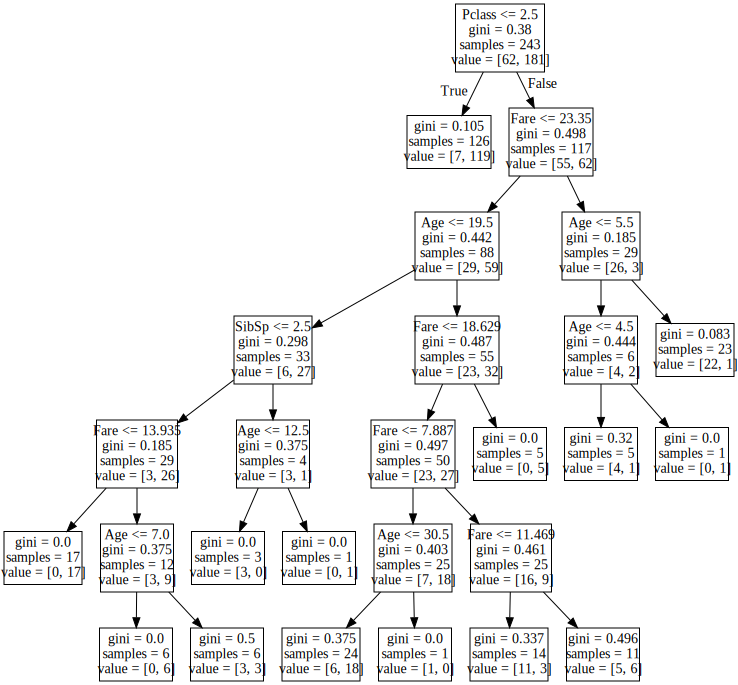

In [40]:
dot_data = export_graphviz(dtree_fc, out_file=None, feature_names=X_fc_train.columns)
graph = graphviz.Source(dot_data)  
graph 

In [64]:
parameters ={'max_depth': range(5,13), 'min_samples_split': range(5,21),
             'min_impurity_decrease': [0.001, 0.002, 0.003, 0.004, 0.005]}
clf_m = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True)
clf_m.fit(X_m_train, y_m_train)
print('Best parameters: ', clf_m.best_params_)
print(clf_m.best_score_, clf_m.score(X_m_test, y_m_test))

Best parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.004, 'min_samples_split': 17}
0.85 0.8109756097560976


In [53]:
dtree_m = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.003)
dtree_m.fit(X_m_train, y_m_train)
dtree_m.score(X_m_test, y_m_test)

0.7926829268292683

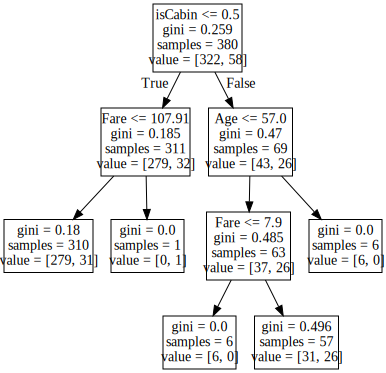

In [54]:
dot_data_m = export_graphviz(dtree_m, out_file=None, feature_names=X_m_train.columns)
graph_m = graphviz.Source(dot_data_m)  
graph_m 

In [57]:
X_m_train2 = X_m_train.drop(['isCabin'], axis=1)
X_m_test2 = X_m_test.drop(['isCabin'], axis=1)
X_m_train2.head()

,Pclass,Age,SibSp,Parch,Fare
810,3,26.0,0,0,7.8875
775,3,18.0,0,0,7.7500
795,2,39.0,0,0,13.0000
845,3,42.0,0,0,7.5500
857,1,51.0,0,0,26.5500


In [65]:
parameters ={'max_depth': range(5,13), 'min_samples_split': range(5,21),
             'min_impurity_decrease': [0.002, 0.003, 0.004, 0.005]}
clf_m = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True)
clf_m.fit(X_m_train2, y_m_train)
print('Best parameters: ', clf_m.best_params_)
print(clf_m.best_score_, clf_m.score(X_m_test2, y_m_test))

Best parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.003, 'min_samples_split': 6}
0.8526315789473684 0.7987804878048781


In [61]:
dtree_m2 = DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.003)
dtree_m2.fit(X_m_train2, y_m_train)
dtree_m2.score(X_m_test2, y_m_test)

0.823170731707317

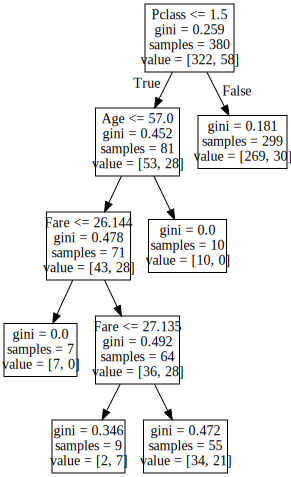

In [62]:
dot_data_m2 = export_graphviz(dtree_m2, out_file=None, feature_names=X_m_train2.columns)
graph_m2 = graphviz.Source(dot_data_m2)  
graph_m2 

In [72]:
XY_m_train[XY_m_train['Parch'] > 0].groupby(['Pclass', 'SibSp'])['y'].mean()

Pclass  SibSp
1       0        0.125000
        1        0.600000
        3        0.000000
2       0        0.000000
        1        0.000000
3       0        0.000000
        1        0.090909
        3        0.000000
        4        0.000000
        5        0.000000
        8        0.000000
Name: y, dtype: float64

In [75]:
X_fc_train2 = X_fc_train.drop(['isCabin'], axis=1)
X_fc_test2 = X_fc_test.drop(['isCabin'], axis=1)
X_fc_train2.head()

,Pclass,Age,SibSp,Parch,Fare
680,3,30.0,0,0,8.1375
727,3,30.0,0,0,7.7375
84,2,17.0,0,0,10.5000
542,3,11.0,4,2,31.2750
369,1,24.0,0,0,69.3000


In [79]:
parameters = {'max_depth': range(5,10), 'min_samples_split': range(5,21),
              'min_impurity_decrease': [0.002, 0.003, 0.004, 0.005]}
clf_fc2 = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True)
clf_fc2.fit(X_fc_train2, y_fc_train)
print('Best parameters: ', clf_fc2.best_params_)
print(clf_fc2.best_score_, clf_fc2.score(X_fc_test2, y_fc_test))

Best parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.005, 'min_samples_split': 7}
0.8559670781893004 0.7788461538461539
